# Question 1

## Q1.1 generate data:
(a) $X=\left[-1, -0.99, -0.98, \ldots, 0.98, 0.99, 1\right]$ 
 
(b) $Y = 2\cdot X$
 
(c) write a function noise_var(v) which receives an array and adds **to each element** a sample from a normal distribution with mean 0 and variance 0.01. 

(d) using the function you wrote in clause (c) generate $X'$. Where $X'$ is a vector defined as following:
- for all $x_i\in X, x'_i\in X'$
- $ x'_i=x_i+n_i $ 
- $n_i\sim \mathcal{N}\left(0, 0.01\right)$ 

(d) Repeat the same process as in (d) to create $Y'$

In [15]:
# a 
import numpy as np
X = np.arange(-1, 1.01, 0.01)

# b
Y = 2 * X

# c 
def noise_var(v):
    noise = np.random.normal(loc=0, scale=0.01,size=v.size)
    return v + noise
# d
X_prime = noise_var(X)

# d_bis
Y_prime = noise_var(Y)

## Q1.2
Are $X'$ and $Y'$ statistically dependent? what type of dependence? how can you show that? 

1. explain in words
2. show with math (in code)


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

Y is computed from X, as well as X_prime. Even if they both have a normal noise compononent that are both mutually indenpendant,still they are dependant. 
Let us denote $n_X, n_Y$ the normal noise components of $X'$ and $Y'$
$$ cov(X', Y') = cov(X + n_X, Y + n_Y)  $$
iif $$ cov(X', Y') = 2var(X) + cov(n_X, n_Y) + 3cov(n_X, X) $$
and since $cov(n_X, n_Y) = 0$ and $cov(n_X, X) = 0$
we have $$var(X) \neq 0$$
Proving that $X'$ and $Y'$ are not independant.

In [62]:
print("As a matter of fact:\nVar(X) = {}".format(np.var(X)))

As a matter of fact:
Var(X) = 0.3366666666666672


# Question 2


Load the data in movie_rating.csv into a dataframe. The data consists of critic ratings and people votes for a set of 20 movies.
## Q2.1
Compute the linear correlation between critic ratings and people votes


*hint - most mathematical operations you encounter are already implemented in the Python libraries you know. Use them.*

In [64]:
import pandas as pd
movie_ratings = pd.read_csv(r"./movie_rating.csv")
print(movie_ratings)
data = movie_ratings[['people_vote', 'rating']]
correlation = data.corr(method='pearson')
print(correlation.iloc[0, 1])

    Unnamed: 0  people_vote    rating
0            0    60.000000  7.003429
1            1    73.812940  8.102049
2            2    87.096481  8.969485
3            3    70.698214  7.506635
4            4    71.963592  7.366683
5            5    77.324780  9.145239
6            6    66.217744  7.305087
7            7    76.967948  7.676270
8            8    71.544984  7.532199
9            9    87.737301  8.919858
10          10     0.000000  8.277864
11          11    72.226742  7.438831
12          12    73.678649  7.162646
13          13    65.938289  7.282963
14          14    69.918449  8.174584
15          15    81.215610  8.351664
16          16    90.686229  9.311104
17          17    89.766294  8.971237
18          18    92.000000  8.716253
19          19    72.240256  7.796572
0.33695346478287086


## Q2.2
(a) To explore the connection between critic ratings and people votes, draw them against each other in a scatter plot. 

Text(0, 0.5, 'ratings')

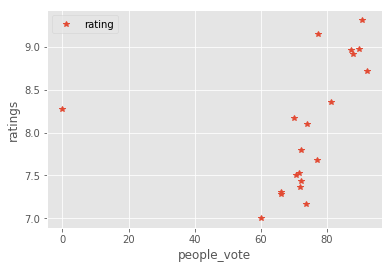

In [41]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
movie_ratings.plot(x='people_vote', y='rating', style='*')
plt.xlabel('people_vote')
plt.ylabel('ratings')

(b) Create a new data frame, with all the movies, except the one with the lowest people vote. 

In [53]:
edited_movie_ratings = movie_ratings.drop(movie_ratings['people_vote'].idxmin())
print(edited_movie_rating)

    Unnamed: 0  people_vote    rating
0            0    60.000000  7.003429
1            1    73.812940  8.102049
2            2    87.096481  8.969485
3            3    70.698214  7.506635
4            4    71.963592  7.366683
5            5    77.324780  9.145239
6            6    66.217744  7.305087
7            7    76.967948  7.676270
8            8    71.544984  7.532199
9            9    87.737301  8.919858
11          11    72.226742  7.438831
12          12    73.678649  7.162646
13          13    65.938289  7.282963
14          14    69.918449  8.174584
15          15    81.215610  8.351664
16          16    90.686229  9.311104
17          17    89.766294  8.971237
18          18    92.000000  8.716253
19          19    72.240256  7.796572


(c) Draw a scatter plot for the movies selected. Is there a linear connection? Explain.

Text(0, 0.5, 'ratings')

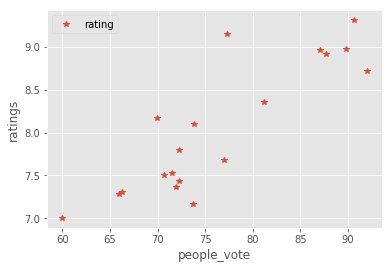

In [54]:
%matplotlib inline
matplotlib.style.use('ggplot')

edited_movie_ratings.plot(x='people_vote', y='rating', style='*')
plt.xlabel('people_vote')
plt.ylabel('ratings')

In [63]:
edited_correlation = edited_movie_rating[['people_vote', 'rating']].corr()
print(edited_correlation.iloc[0,1])

0.8609465459222101


We ve removed the one that was an outlier value.
It now looks like there s a linear relationship between people_vote and movie_rating: The linear correlation has drastically increased, highlighting a strong linear correlation between variables.

(d) Congragulations you've encountered an outlier, a data point so far from the others, keeping it may adversely affect results. 
Linear correlation is sensitive to distance. Handling outliers is important and most cases are harder than this one, due to complexity (hunderds of variables), size (thousands of movies), etc. In this case a possible remedy would be to use order statistics or ranks (1st, 2nd,...).

$$
\small
X=\{100,0, 15, 50\}
\rightarrow
rank(X)=\{4, 1, 2, 3\}
$$

- Create a new data frame for all movies with all critic ratings replaced by their rank and the same for people vote. 
- Draw a scatter plot
- compute the linear correlation.

    people_vote  rating
0           2.0     1.0
1          12.0    11.0
2          16.0    17.0
3           6.0     7.0
4           8.0     5.0
5          14.0    19.0
6           4.0     4.0
7          13.0     9.0
8           7.0     8.0
9          17.0    16.0
10          1.0    13.0
11          9.0     6.0
12         11.0     2.0
13          3.0     3.0
14          5.0    12.0
15         15.0    14.0
16         19.0    20.0
17         18.0    18.0
18         20.0    15.0
19         10.0    10.0
The linear crosscorrelation is: 0.724812030075188


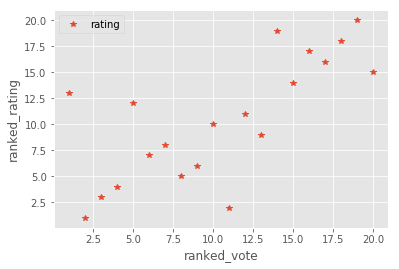

In [78]:
from copy import deepcopy
ranked_movie_ratings = deepcopy(data)
#print(ranked_movie_ratings)
ranked_movie_ratings['people_vote'] = ranked_movie_ratings['people_vote'].rank()
ranked_movie_ratings['rating'] = ranked_movie_ratings['rating'].rank()
print(ranked_movie_ratings)

%matplotlib inline
matplotlib.style.use('ggplot')

ranked_movie_ratings.plot(x='people_vote', y='rating', style='*')
plt.xlabel('ranked_vote')
plt.ylabel('ranked_rating')

rank_linear_correlation = ranked_movie_ratings.corr(method='spearman')
print('The linear crosscorrelation is: {}'.format(rank_linear_correlation.iloc[0, 1]))

Correlation over ranks is named Spearman correlation.

# Question 3
Read the csv file bank-full.csv into a data frame. The description
of this data can be found in bank-info.txt

(a) Compute the Spearman correlation between days from last contact and previous campaign contacts

The linear cross correlation without cleaning the dataset: 0.9856446382444941


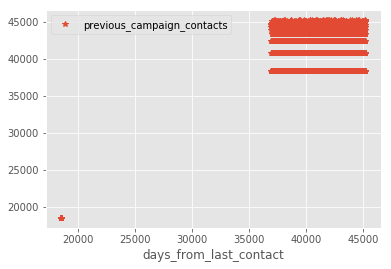

In [145]:
bank_df = pd.read_csv(r'./bank-full.csv')
#print(bank_df)
relevant_df = deepcopy(bank_df[['days_from_last_contact', 'previous_campaign_contacts']])
#print(relevant_df)
relevant_df['days_from_last_contact'] = relevant_df['days_from_last_contact'].rank(method='average')
relevant_df['previous_campaign_contacts'] = relevant_df['previous_campaign_contacts'].rank(method='average')
#print(relevant_df)

relevant_df.plot(x='days_from_last_contact', y='previous_campaign_contacts', style='*')

print('The linear cross correlation without cleaning the dataset: {}'.format(relevant_df.corr(method='spearman').iloc[0, 1]))


We can think of a linear correlation between the two variables, but we need to carry a deeper study on the small blob in the left back corner...

       days_from_last_contact  previous_campaign_contacts
0                          -1                           0
1                          -1                           0
2                          -1                           0
3                          -1                           0
4                          -1                           0
5                          -1                           0
6                          -1                           0
7                          -1                           0
8                          -1                           0
9                          -1                           0
10                         -1                           0
11                         -1                           0
12                         -1                           0
13                         -1                           0
14                         -1                           0
15                         -1                           0
16            

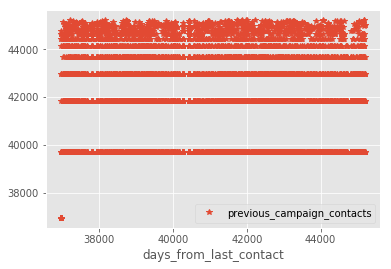

In [128]:
bank_df = pd.read_csv(r'./bank-full.csv')
#print(bank_df)
relevant_df = deepcopy(bank_df[['days_from_last_contact', 'previous_campaign_contacts']])
print(relevant_df)
relevant_df['days_from_last_contact'] = relevant_df['days_from_last_contact'].rank(method='max')
relevant_df['previous_campaign_contacts'] = relevant_df['previous_campaign_contacts'].rank(method='max')
print(relevant_df)

relevant_df.plot(x='days_from_last_contact', y='previous_campaign_contacts', style='*')

print('The linear cross correlation without cleaning the dataset: {}'.format(relevant_df.corr(method='spearman').iloc[0, 1]))

In [131]:
unknown_index = bank_df.index[bank_df['days_from_last_contact'] == -1].tolist()

In [138]:
cleaned_df = bank_df.drop(unknown_index)
print(len(cleaned_df))

8257


In [139]:
cleaned_df['days_from_last_contact'] = cleaned_df['days_from_last_contact'].rank(method='average')
cleaned_df['previous_campaign_contacts'] = cleaned_df['previous_campaign_contacts'].rank(method='average')

In [141]:
cleaned_df.plot(x='days_from_last_contact', y='previous_campaign_contacts', style='*')

In [140]:
print('The cleaned linear cross correlation is: {}'.format(cleaned_df.corr(method='spearman').iloc[0,1]))

The cleaned linear cross correlation is: 0.09484749194506427


(b) Is there an actual linear correlation between the ranks? Explain, and back your claims with math and plots. 

removing the outliers corresponding to unfill information for days_from_last_contact, we clearly see that there s no more appearing linear cross correlation. This is confirmed by the updated linear cross correlation!